#####  Name      : BHARATH BOMMEESHWAR K  
#####  Roll_no  : D22012
#####  Date       : 27-04-2023


# <div style="color:white;display:fill;border-radius:10px;background-color:#8ABEB9;overflow:hidden"><p style="padding:20px;color:WHITE;overflow:hidden;font-size:75%;margin:0;text-align:CENTER">INDUSNET HACKATHON</p></div>

### <U> Problem Statement(Assumed):  
* Heart disease is a major global health concern that can be prevented with early detection and intervention. We aim to develop a machine learning model to predict the risk of heart disease in patients based on clinical and demographic factors.The model can help healthcare providers identify high-risk patients and provide appropriate interventions, leading to improved patient outcomes and cost savings.    

### <U>Objective

* The objective is to develop a machine learning model that predicts whether a patient is suffering from heart disease or not. Additionally, we aim to identify the important variables for the overall population based on the provided sample and determine the contribution of each feature in predicting the class of each patient.

### <U>Frame work
    
01. Data Collection        
    1a.Importing necessary libraries  
    1b.Read dataset  
    1c.Metadata  
    
02. Exploratory Data Analysis      
    2a.Number of varibles,data types and null values check  
    2b.Descriptive statistics  
    2c.Count for unique values in each variables  
    2d.Univariate analysis   
    2e.Bivariate analysis      

03. Hypothesis testing  
    3a.Test of Independence  
    3b.Two large Independent population test        
    
04. Data partitioning  
    4a. Train/Test Split  

05. Building baseline model   
    5a. Fitting Logistic regression model  
    5b. Calculate Macfadden R2  
    5c. Assess model perfromance(K-fold Cross validation)     

06. Weight of evidence and Information value     
    6a. Checking the Information Value of each variable    
    6b. Data transformation using WOE Values          
    6c. Fitting logistic regression model and cross validation   
    6d. Hyperparameter tuning of the model      
    6e. Cross validation with best parameters of the model     

07. Training Non-parametric model(Random forest)   
    7a. Variable importance  
    7b. Cross validation with default model   
    7c. Hyperparameter tuning and cross validation    

08. Predict the test data    
    8a.Transforming test data with WOE values  
    8b.Predict test data with Logistic regression and Random forest  

09. Model performance in prediction  
    9a.Logistic Regression  
    9b.Random forest  
    9c.Visualizing AUROC graph      

10. Shapley values   
   10a.Calculate shapley values for logistic regression   
   10b.Interpreting instances  

11. Conclusion    
    

### <u> 1. DATA COLLECTION

### 1a. Importing necessary libraries

In [1721]:
#datastructures and tools
import pandas as pd

#matrices and arrays
import numpy as np

#vizualizations
import seaborn as sns
import matplotlib.pyplot as plt

#to hide harmless warnings
import warnings
warnings.filterwarnings('ignore')

#to work with time computation
import time

#scientific computation
from scipy import stats
import statsmodels.formula.api as sm
from scipy.stats import pointbiserialr

#Splitting the data Train/Test
from sklearn.model_selection import train_test_split

# importing Logistic regression algorithm
from sklearn.linear_model import LogisticRegression

# importing random forest Classifier algorithm
from sklearn.ensemble import RandomForestClassifier

#for cross validation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification

# import Scoring metric like f1_score,auroc,recall,Classification Report
import sklearn.metrics as mat
from sklearn.metrics import f1_score,classification_report,roc_auc_score,accuracy_score,recall_score

# for model interpretation
import shap

In [1722]:
#others
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### 1b.Read dataset

In [1723]:
# reading the data
data = pd.read_csv("Dataset.csv")

In [1724]:
# making a copies of raw dataset for using in various trials
df = data.copy()
df1 = data.copy()
df2 = data.copy()
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
5,56,1,1,120,236,0,0,178,0,0.8,0,0,1,0
6,62,0,3,140,268,0,2,160,0,3.6,2,2,1,1
7,57,0,3,120,354,0,0,163,1,0.6,0,0,1,0
8,63,1,3,130,254,0,2,147,0,1.4,1,1,3,1
9,53,1,3,140,203,1,2,155,1,3.1,2,0,3,1


### 1c.Metadata

* <B>This database contains 13 attributes and a target variable. It has 8 nominal values and 5 numeric values. The detailed description of all these features are as follows:

>01.Age: Patients Age in years (Numeric)

>02.Sex: Gender (Male : 1; Female : 0) (Nominal)

>03.cp: Type of chest pain experienced by patient. This term categorized into 4 category.  

        >0 typical angina,  
        >1 atypical angina,  
        >2 non- anginal pain,  
        >3 asymptomatic (Nominal)  
    
>04.trestbps: patient's level of blood pressure at resting mode in mm/HG (Numerical)

>05.chol: Serum cholesterol in mg/dl (Numeric)

>06.fbs: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)

>07.restecg: Result of electrocardiogram while at rest are represented in 3 distinct values

        >0 : Normal 
        >1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >0.05 mV) 
        >2: showing probable or definite left ventricular hypertrophyby Estes' criteria (Nominal)

>08.thalach: Maximum heart rate achieved (Numeric)

>09.exang: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)

>10.oldpeak: Exercise induced ST-depression in relative with the state of rest (Numeric)

>11.slope: ST segment measured in terms of slope during peak exercise

        >0: up sloping;
        >1: flat;
        >2: down sloping(Nominal)
    
>12.ca: The number of major vessels (0–3)(ordinal)

>13.thal: A blood disorder called thalassemia

        >0: NULL 
        >1: normal blood flow
        >2: fixed defect (no blood flow in some part of the heart)
        >3: reversible defect (a blood flow is observed but it is not normal(nominal)
    
>14.target: It is the target variable which we have to predict 1 means patient is suffering from heart disease and 0 means patient is normal.



### <u> 2.EXPLORATORY DATA ANALYSIS

###  <b>2a.No of varibles,data types and null values check

In [1725]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


 <u> Observations:
* The data type are relevant for each variables which shows there is no incorrect data format  
* There are totally 303 observations present in the given data  
* 12 Independent variables and 1 Dependent variable  
* There are only integer and float datatype  

### <b> 2b.Descriptive statistics

In [1819]:
df.describe()

,sex,cp,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.679868,2.158416,246.693069,0.148515,0.990099,149.607261,0.326733,0.600660,0.663366,1.831683,0.458746
std,0.467299,0.960126,51.776918,0.356198,0.994971,22.875003,0.469794,0.616226,0.934375,0.956705,0.499120
min,0.000000,0.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,2.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,2.000000,241.000000,0.000000,1.000000,153.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,3.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.000000,1.000000,3.000000,1.000000
max,1.000000,3.000000,564.000000,1.000000,2.000000,202.000000,1.000000,2.000000,3.000000,3.000000,1.000000


### <b> 2c.Count for unique values in each variables

In [1727]:
val = []

for i in df.columns: 
    val.append(len(df[i].unique()))
    
data_f = pd.DataFrame(val,columns=["#Unique"],index=df.columns) 
data_f.T

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
#Unique,41,2,4,50,152,2,3,91,2,40,3,4,3,2


### <b>2d. Univariate analysis

In [1728]:
#Frequency plot
def count_plot(var):
    plt.figure(figsize=(17,5))
    sns.set(font_scale=2)
    sns.countplot(df[var],data = df, palette='hls')
    plt.xticks(rotation = 90)
    plt.title("Frequency"+" vs "+var)
    return (plt.show())

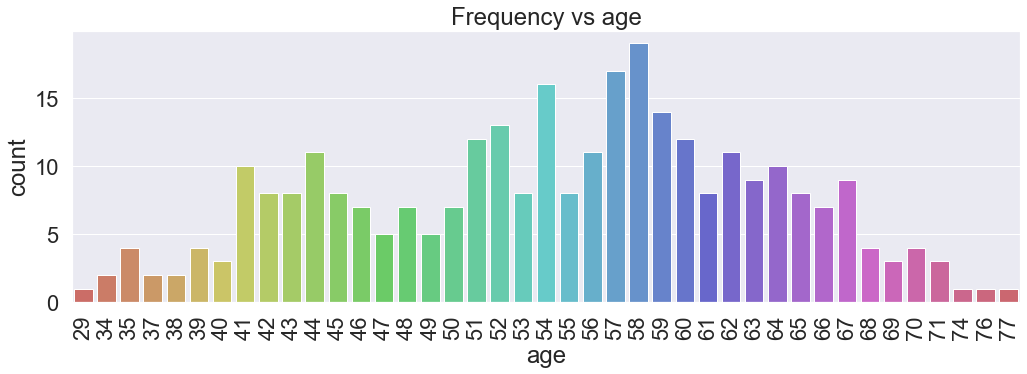

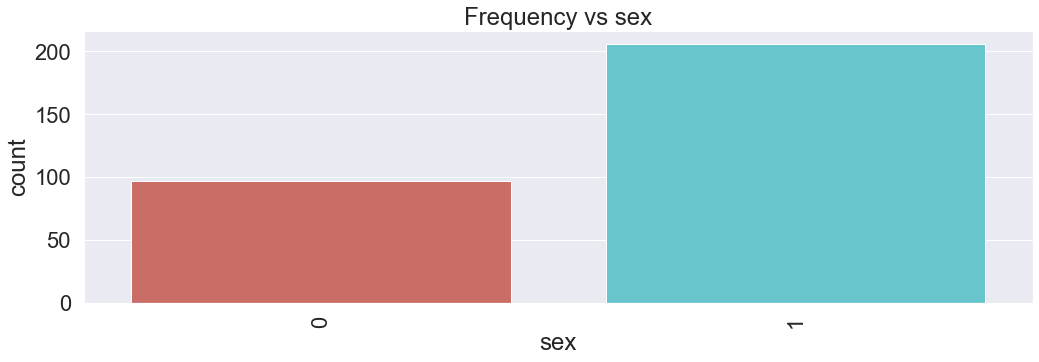

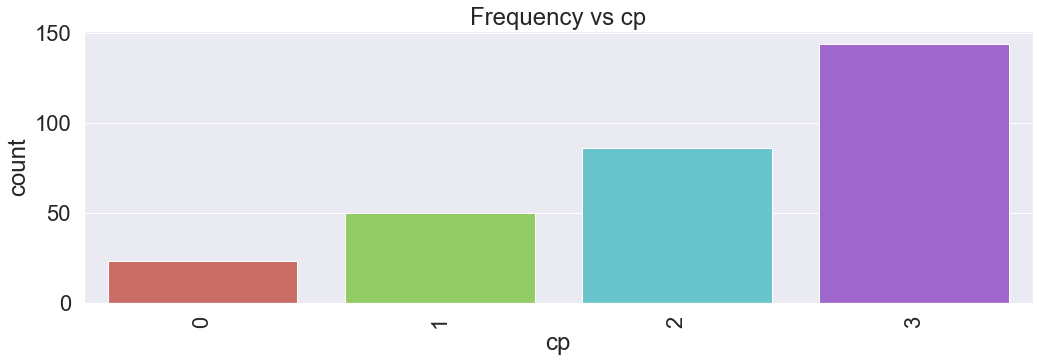

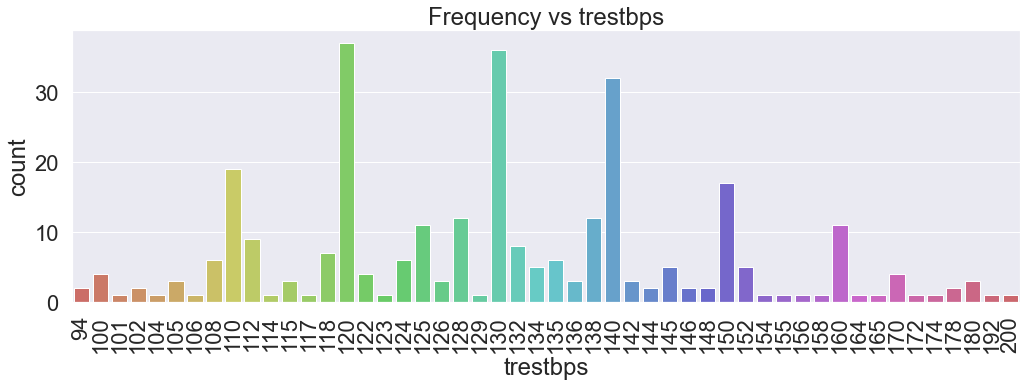

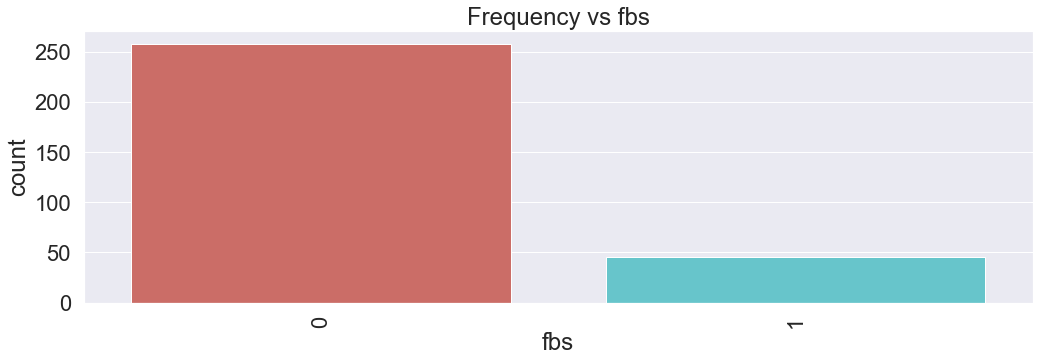

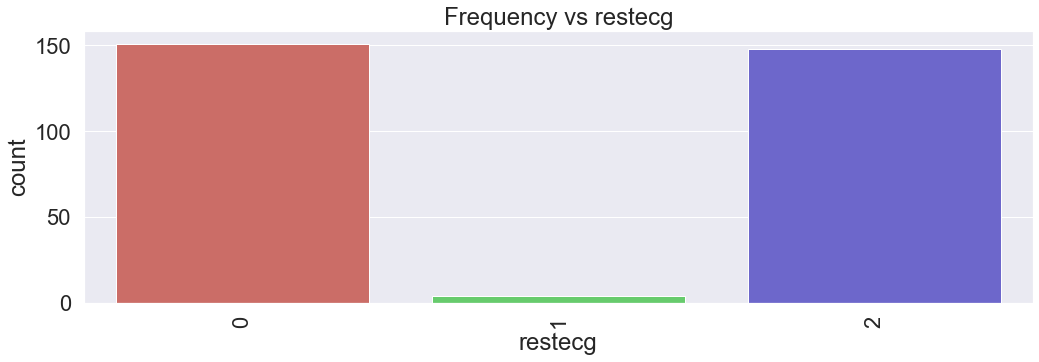

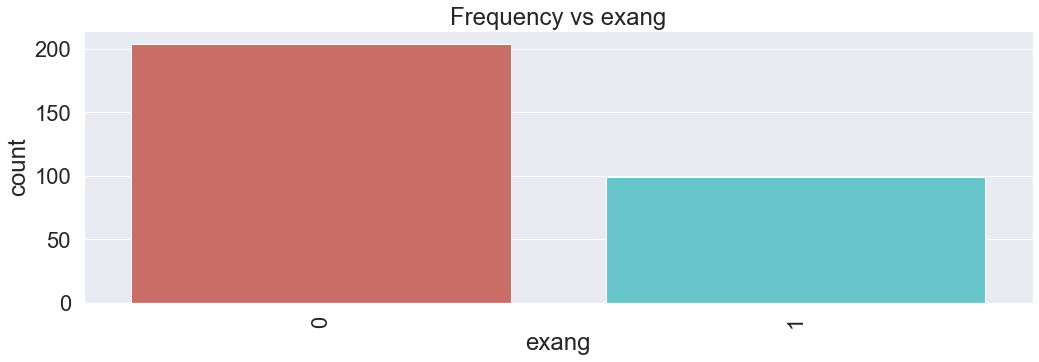

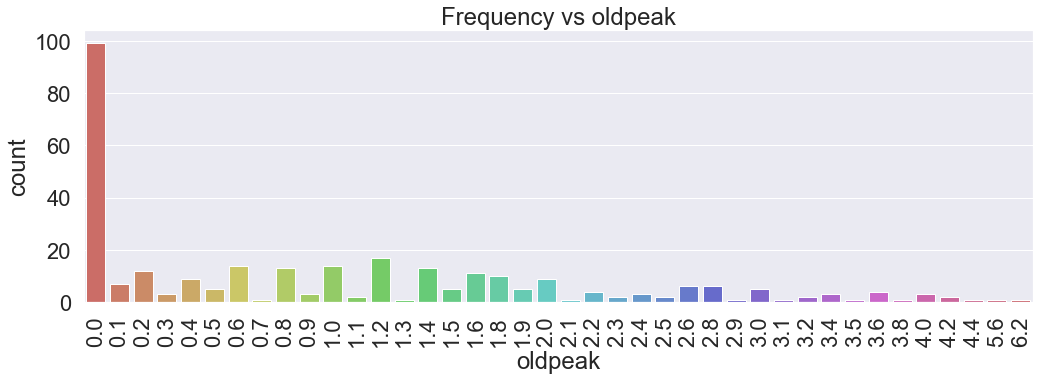

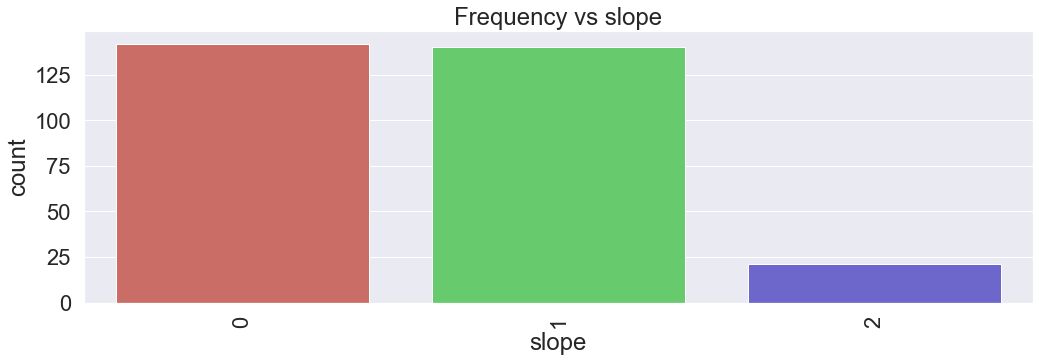

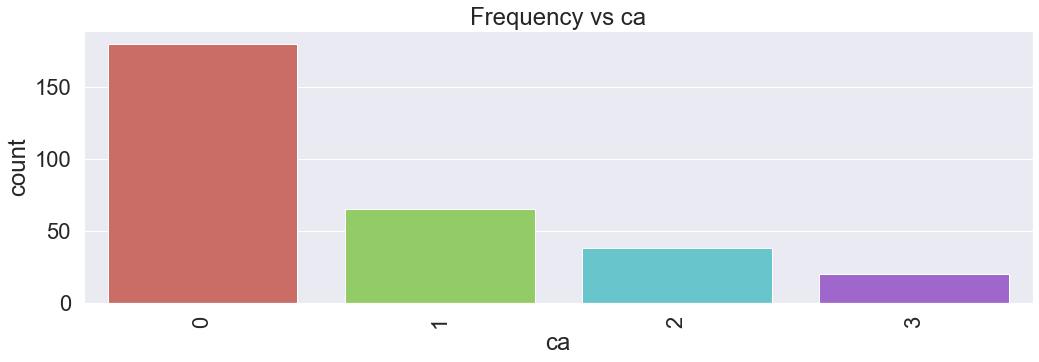

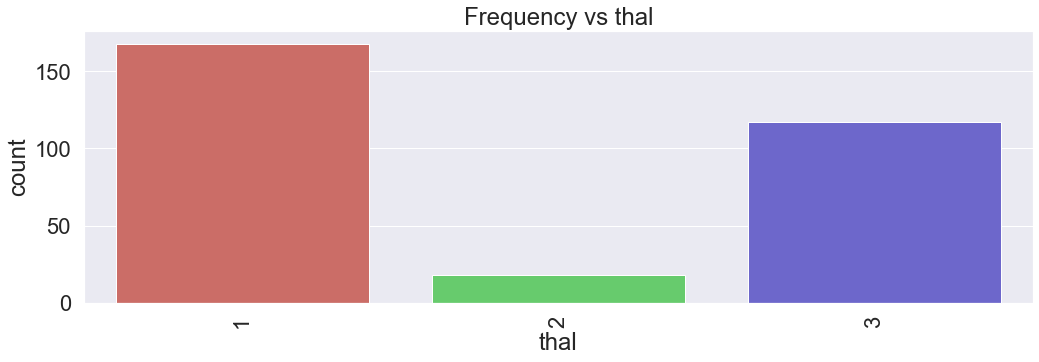

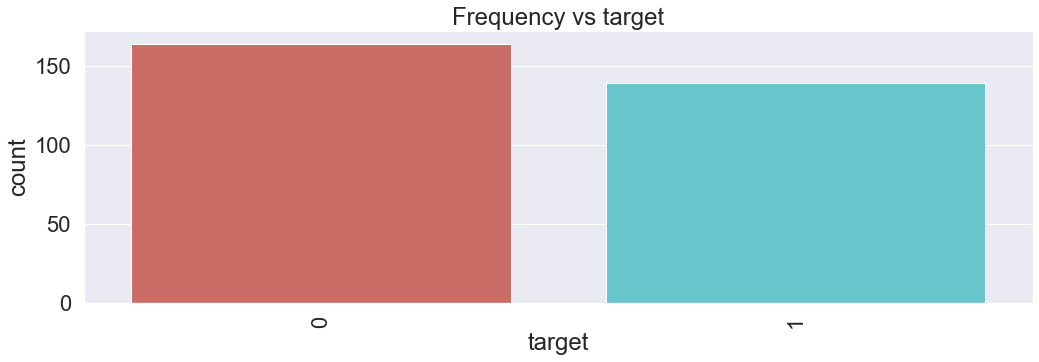

In [1729]:
#Discrete numerical data
d_n = ['age','sex','cp','trestbps','fbs','restecg','exang','oldpeak','slope','ca','thal','target']
for i in d_n:
    count_plot(i)

In [1730]:
#Frequency plot
def dist_plot(var):
    plt.figure(figsize=(17,5))
    sns.set(font_scale=2)
    sns.distplot(df[var])
    plt.xticks(rotation = 90)
    plt.title("Frequency"+" vs "+var)
    return (plt.show())

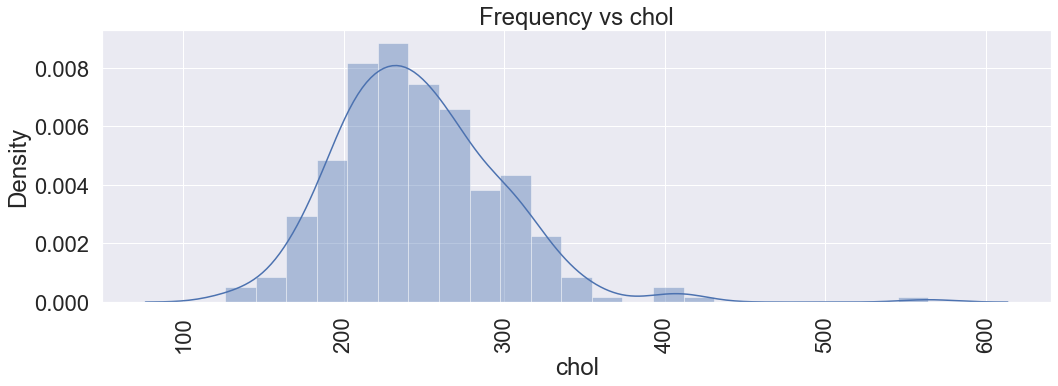

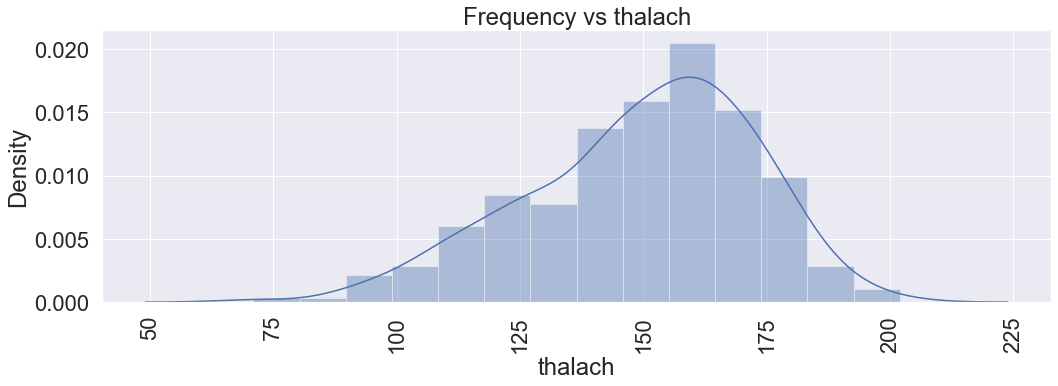

In [1731]:
#Discrete numerical data
d_n = ['chol','thalach']
for i in d_n:
    dist_plot(i)

### <font color= green>  Observations from univariate analysis:
    
In our dataset irrespective of taking heart disease into account,

* The mean age of the people is 54 which shows there are more middle-aged to older individuals
* The number of males are twice the size of females 
* 47% of the people are asymptomatic
* The average resting blood pressure recorded among people is 130mm/HG and the maximum blood pressure is 200mm/HG
* 14% of the people blood sugar level is > 120mg/dl
* Only 50% of the people has normal electrocardiogram results
* 32% of the people experience chest pain(angina) when they exercise
* 68% of the people has ST depression when exercised in relative with the state of rest.
* 46% of the people a flat ST segment whereas the rest either has it upsloping or downsloping.
* 39% of the people has one or more coronary blocked arteries
* 55% of the people has normal blood flow in the heart
* the observed average chloerstrol level is 246mg/dl
* the maximum average heart rate achieved during stress test is 150bpm

### <b> 2e.Bivariate analysis

In [1732]:
# function to write percentage
def percentage_above_bar_relative_to_xgroup(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=21, ha='center', va='bottom')

In [1733]:
# stacked bar plot
def stack_plot(var):
    plt.figure(figsize=(20, 8))
    sns.set(font_scale=2)
    ax3 = sns.countplot(x=var, hue="target", data=df)
    ax3.set(xlabel=var, ylabel='Count')
    percentage_above_bar_relative_to_xgroup(ax3)
    plt.show()

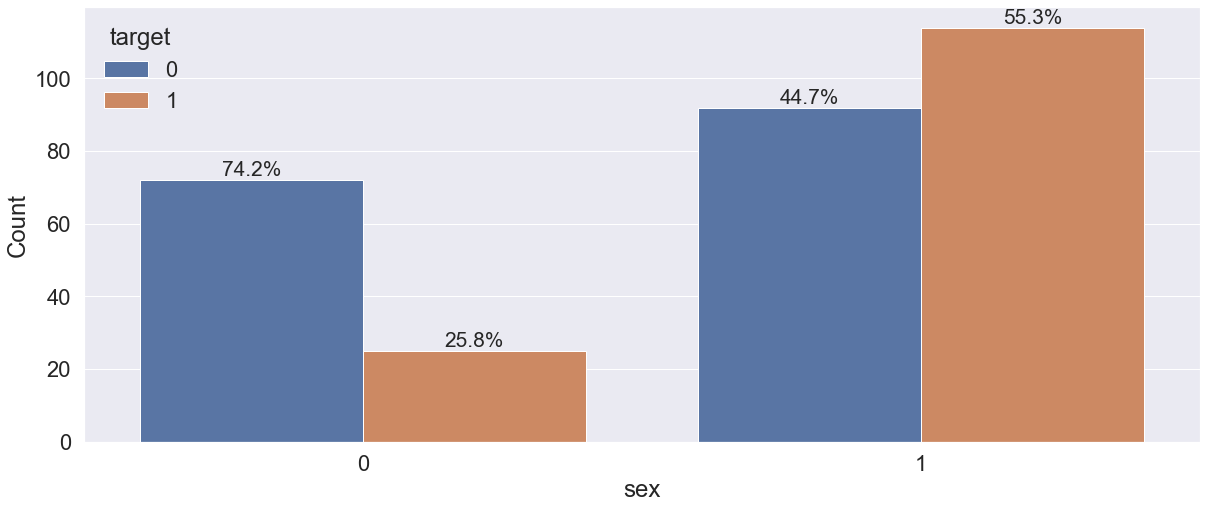

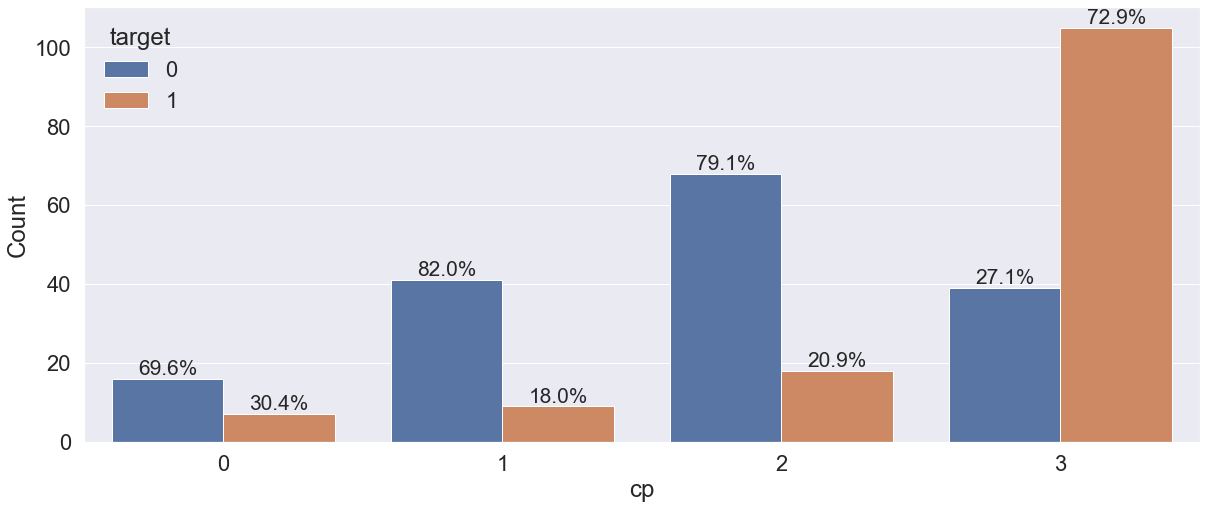

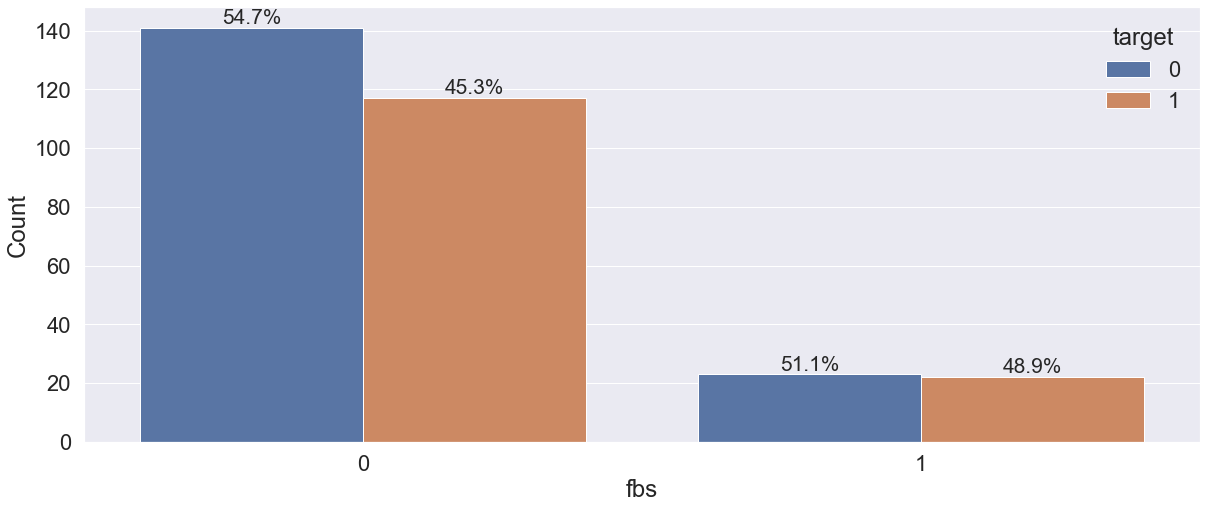

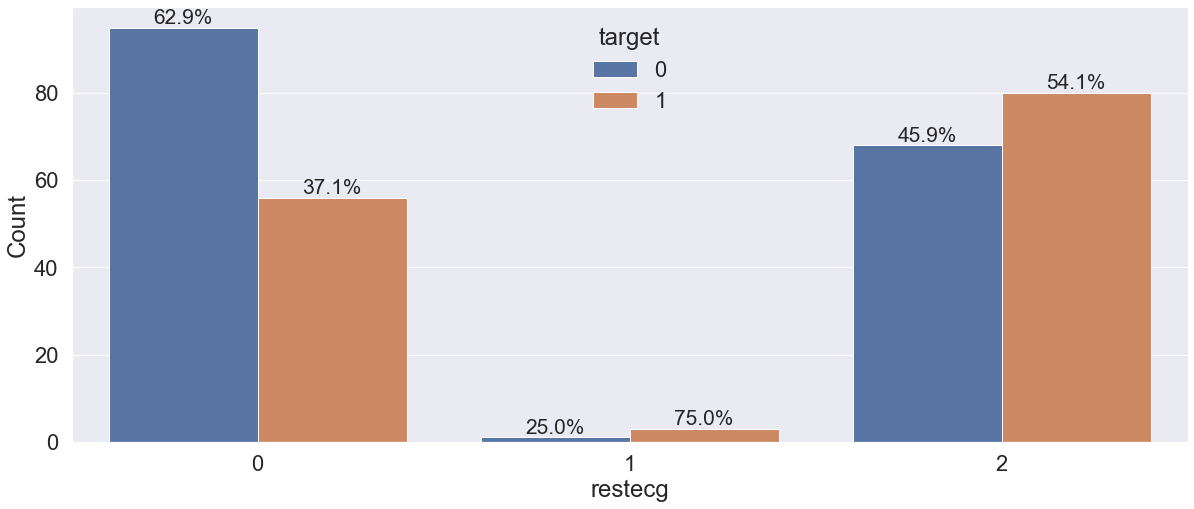

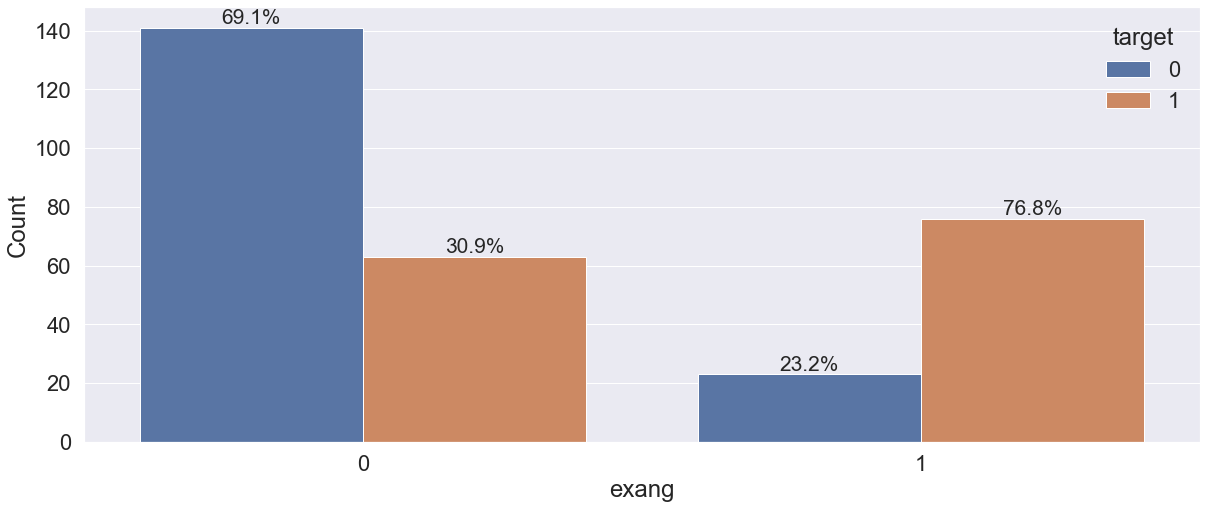

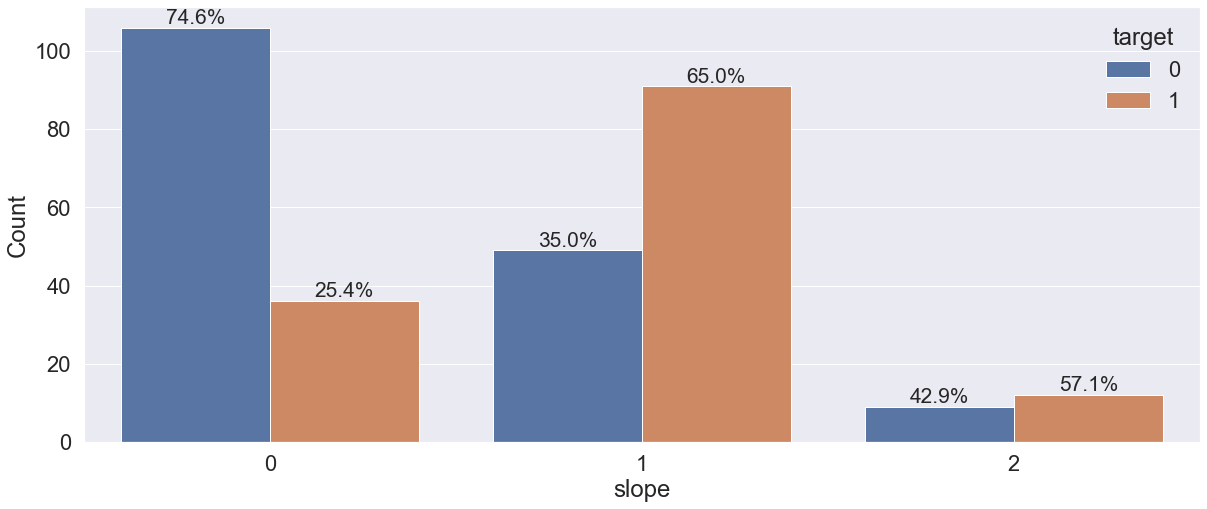

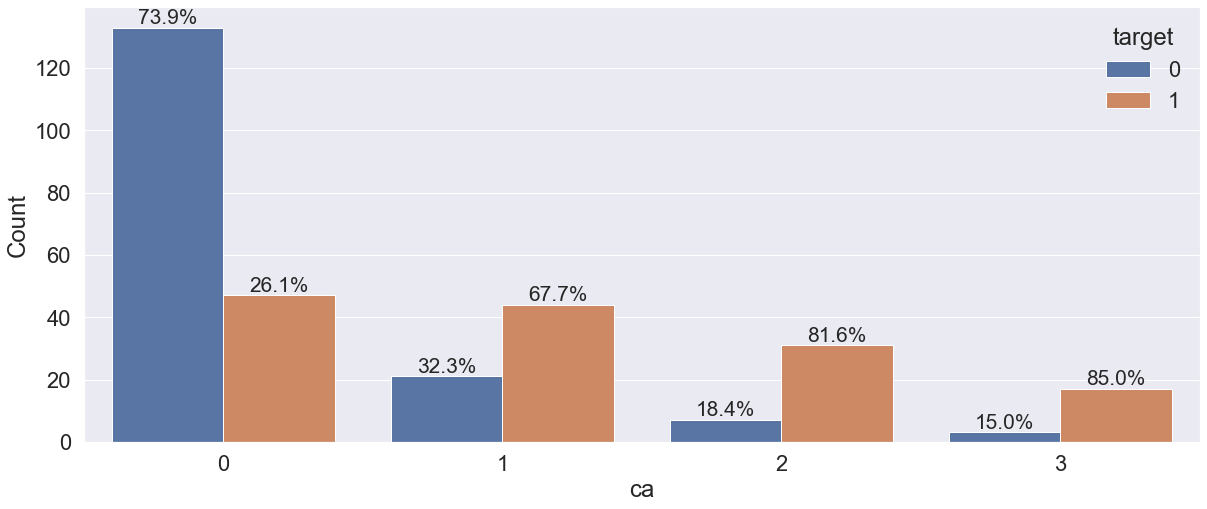

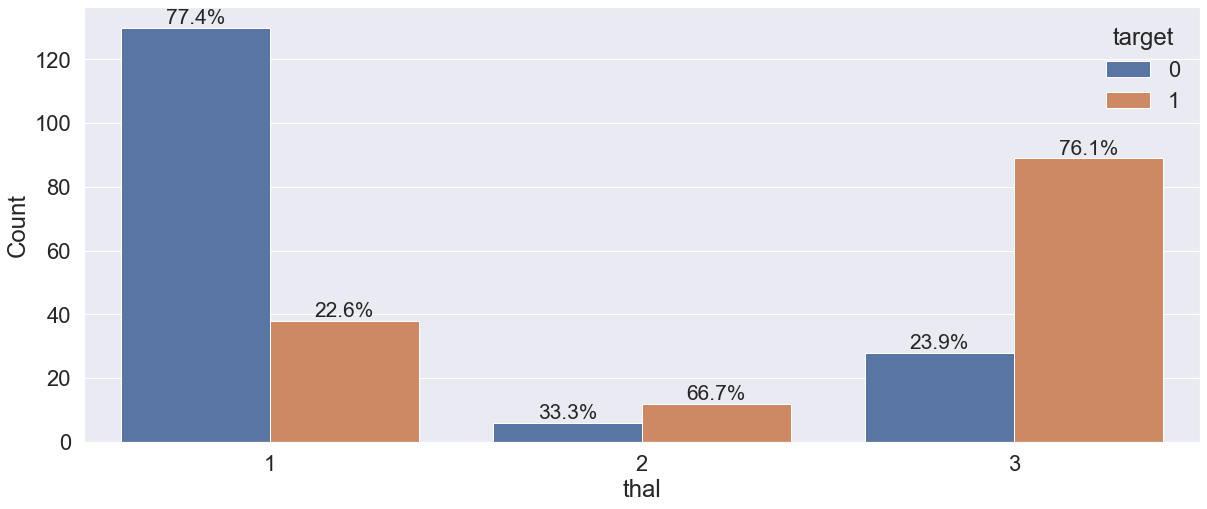

In [1734]:
for i in ['sex','cp','fbs','restecg','exang','slope','ca','thal']:
    stack_plot(i)

In [1735]:
# AGE VS TARGET
pd.crosstab(df["target"],columns=df["age"])

age,29,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,74,76,77
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,2,2,2,1,3,1,9,7,5,8,6,4,3,4,3,4,9,9,6,10,3,5,7,7,5,3,1,4,3,6,4,4,3,2,2,1,3,1,1,0
1,0,0,2,0,1,1,2,1,1,3,3,2,3,2,3,2,3,3,4,2,6,5,6,10,12,9,9,7,7,6,4,4,3,6,2,1,3,0,0,0,1


In [1736]:
# Assigning bins for age
age_bins = [20,30,40,50,60,70,80]
df['age'] = pd.cut(df['age'], bins=age_bins)

In [1737]:
# Binned age
age_crosstab = pd.crosstab(df["target"],columns=df["age"])
age_crosstab

age,"(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
target,,,,,,
0,1,11,53,64,30,5
1,0,6,23,66,43,1


In [1738]:
age_rowtotal=age_crosstab.sum(axis=1)
age_crosstab.div(age_rowtotal,axis=0)

age,"(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
target,,,,,,
0,0.006098,0.067073,0.323171,0.390244,0.182927,0.030488
1,0.000000,0.043165,0.165468,0.474820,0.309353,0.007194


In [1739]:
# OLD PEAK VS TARGET
pd.crosstab(df["target"],columns=df["oldpeak"])

oldpeak,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.4,3.5,3.6,3.8,4.0,4.2,4.4,5.6,6.2
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,73,4,9,2,8,4,10,1,7,1,4,2,7,1,6,4,7,3,2,2,0,0,2,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1,26,3,3,1,1,1,4,0,6,2,10,0,10,0,7,1,4,7,3,7,1,4,0,2,2,5,6,1,4,1,2,3,0,4,1,3,1,1,1,1


In [1740]:
# Assigning bins for oldpeak
oldpeak_bins = [0,1,2,3,4,5,6,7]
df['oldpeak'] = pd.cut(df['oldpeak'], bins=oldpeak_bins)

In [1741]:
# Binned oldpeak
oldpeak_crosstab = pd.crosstab(df["target"],columns=df["oldpeak"])
oldpeak_crosstab

oldpeak,"(0, 1]","(1, 2]","(2, 3]","(3, 4]","(4, 5]","(5, 6]","(6, 7]"
target,,,,,,,
0,50,34,5,1,1,0,0
1,31,39,25,14,2,1,1


In [1742]:
oldpeak_rowtotal=oldpeak_crosstab.sum(axis=1)
oldpeak_crosstab.div(oldpeak_rowtotal,axis=0)

oldpeak,"(0, 1]","(1, 2]","(2, 3]","(3, 4]","(4, 5]","(5, 6]","(6, 7]"
target,,,,,,,
0,0.549451,0.373626,0.054945,0.010989,0.010989,0.00000,0.00000
1,0.274336,0.345133,0.221239,0.123894,0.017699,0.00885,0.00885


In [1743]:
# TRESTBPS VS TARGET
pd.crosstab(df["target"],columns=df["trestbps"])

trestbps,94,100,101,102,104,105,106,108,110,112,114,115,117,118,120,122,123,124,125,126,128,129,130,132,134,135,136,138,140,142,144,145,146,148,150,152,154,155,156,158,160,164,165,170,172,174,178,180,192,200
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2,2,1,2,1,3,1,4,8,5,0,3,0,5,23,3,0,2,4,1,6,1,23,3,2,5,1,9,17,2,0,1,1,1,9,2,0,1,1,0,5,0,0,1,1,0,1,1,0,0
1,0,2,0,0,0,0,0,2,11,4,1,0,1,2,14,1,1,4,7,2,6,0,13,5,3,1,2,3,15,1,2,4,1,1,8,3,1,0,0,1,6,1,1,3,0,1,1,2,1,1


In [1744]:
# Assigning bins for trestbps
trestbps_bins = [80,100,120,140,160,180,200]
df['trestbps'] = pd.cut(df['trestbps'], bins=trestbps_bins)

In [1745]:
# Binned trestbps
trestbps_crosstab = pd.crosstab(df["target"],columns=df["trestbps"])
trestbps_crosstab

trestbps,"(80, 100]","(100, 120]","(120, 140]","(140, 160]","(160, 180]","(180, 200]"
target,,,,,,
0,4,56,77,23,4,0
1,2,35,63,28,9,2


In [1746]:
trestbps_rowtotal=trestbps_crosstab.sum(axis=1)
trestbps_crosstab.div(trestbps_rowtotal,axis=0)

trestbps,"(80, 100]","(100, 120]","(120, 140]","(140, 160]","(160, 180]","(180, 200]"
target,,,,,,
0,0.024390,0.341463,0.469512,0.140244,0.024390,0.000000
1,0.014388,0.251799,0.453237,0.201439,0.064748,0.014388


### <font color= green>  Observations from Bivariate analysis:
    
Under our analysis in the given dataset, 

* Gender: Among individuals with heart disease, 55% are men.

* Asymptomatic Individuals: Out of those who are asymptomatic, 73% have heart disease.

* Blood Sugar and Left Ventricular Hypertrophy: Among individuals with normal blood sugar levels after fasting, 45% have heart disease. Additionally, among individuals with left ventricular hypertrophy (by Estes), 54% have heart disease.

* Angina: Among individuals with angina, 77% have heart disease.

* Flat ST Segment: Among individuals with a flat ST segment, 65% have heart disease.

* Coronary Blocked Arteries: More than 80% of individuals with greater than two coronary blocked arteries have heart disease.

* Abnormal Blood Flow: Among individuals with abnormal blood flow, 76% have heart disease.

* Age Range: Among individuals with heart disease, 77% are between the ages of 50 and 70.

* ST Depression: The presence of ST depression between 2 to 3 increases the likelihood of having heart disease.

* High Blood Pressure: Individuals with a resting blood pressure greater than 180mm/HG have a 100% likelihood of having heart disease.

### <u> 03. HYPOTHESIS TESTING

### <b> 3a.Test of Independence
    
  Identifying the relationship between Binary target(dependent) and Categorical/discrete numerical variables(independent) 

In [1747]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [1748]:
# Assigning bins for age
age_bins = [20,30,40,50,60,70,80]
names = [1,2,3,4,5,6]
df1['age'] = pd.cut(df1['age'], bins=age_bins,labels=names)

In [1749]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,5,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,5,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,5,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,2,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,3,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [1750]:
df1['age']=df1['age'].astype(int)

In [1751]:
# Categorical varibles
c_dn = ['age','sex','cp','fbs','restecg','exang','slope','ca','thal']

In [1752]:
#Hypothesis test:

for i in c_dn:
    Data =  pd.crosstab(df1[i],columns = df1['target'])
    
    #H0 : There is no relation between two variables
    #H1 : There exists a relation between two variables

    #Calculate Critical value
    r,c = Data.shape
    alpha = 0.05  #assumed
    x2c = stats.chi2.isf(alpha,df = ((r-1) * (c-1)))
    x2c

    #Chisquare statistic using contingency table
    cont = stats.chi2_contingency(Data)

    # parameters for Cramer's V test
    chi2, p, dof, expected = stats.chi2_contingency(Data)

    n = Data.sum().sum()
    r, c = Data.shape

    V = np.sqrt(chi2 / (n * (min(r, c) - 1)))

    print("Cramer's V:", V)

    # From the contingency table
    # Chisquare statistic
    x2stat = cont[0]
    x2stat

    # p value test
    if stats.chi2.sf(x2stat,df = (r-1)*(c-1)) > alpha:
        print("p > alpha, There is NO SIGNIFICANT relationship between target " + "& " + (i))
        print({"p_value" : cont[1],"alpha" :alpha})
        print("_"*120)
    else:
        print("p < alpha, There is SIGNIFICANT relationship between target " + "& " + (i)) 
        print({"p_value" : cont[1],"alpha" :alpha})
        print("_"*120)

Cramer's V: 0.23950453149002912
p < alpha, There is SIGNIFICANT relationship between target & age
{'p_value': 0.0038314306834613446, 'alpha': 0.05}
________________________________________________________________________________________________________________________
Cramer's V: 0.26971786142706666
p < alpha, There is SIGNIFICANT relationship between target & sex
{'p_value': 2.666712348180942e-06, 'alpha': 0.05}
________________________________________________________________________________________________________________________
Cramer's V: 0.5196335668689597
p < alpha, There is SIGNIFICANT relationship between target & cp
{'p_value': 1.2517106007837527e-17, 'alpha': 0.05}
________________________________________________________________________________________________________________________
Cramer's V: 0.015951147397082577
p > alpha, There is NO SIGNIFICANT relationship between target & fbs
{'p_value': 0.7812734067063785, 'alpha': 0.05}
_____________________________________________

 Cramer's V thersholds - Strength of relationship between Categorical variables
* Small effect: V < 0.1  
* Medium effect: 0.1 ≤ V < 0.3  
* Large effect: V ≥ 0.3  

### <b> 3b.Two large Independent population test   
      To check the difference in mean between the target groups    

In [1753]:
df1.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'], dtype='object')

In [1754]:
#Numerical variable
num = ['trestbps','chol','thalach','oldpeak']

In [1755]:
#Hypothesis testing

for i in num:

    # Step 1 : H0 : mu1 - mu2 = 0 (Variable is insignificant over the target variable)
    #          H1 : mu1 - mu2 != 0 (Variable is significant over the target variable)

    xbar1 = df1.groupby(["target"])[i].mean()[0]
    xbar2 = df1.groupby(["target"])[i].mean()[1]
    s1 = df1.groupby(["target"])[i].std()[0]
    s2 = df1.groupby(["target"])[i].std()[1]
    n1 = df1["target"].value_counts()[0]
    n2 = df1["target"].value_counts()[1]                          
    alpha = 0.05

    #Step 2 : Critical value

    ZcLeft = stats.norm.ppf(alpha/2)
    ZcRight = stats.norm.isf(alpha/2)

    #Step 3: Z-statistic 

    Z = ((xbar1-xbar2)-(0))/np.sqrt((s1**2/n1)+(s1**2/n2))

    #Step 4 Decision based on crtical value method

    if Z > ZcLeft and Z < ZcRight :
        # Calculate point-biserial correlation
        rpb, p_value = pointbiserialr(df1[i], df1["target"])

        print("Point-Biserial Correlation Coefficient:", rpb)
        print("P-value:", p_value) 
        print( i + " is INSIGNIFICANT over the target variable")
        print("_"*100)   
           
    else:
        # Calculate point-biserial correlation
        rpb, p_value = pointbiserialr(df1[i], df1["target"])

        print("Point-Biserial Correlation Coefficient:", rpb)
        print("P-value:", p_value) 
        print( i + " is SIGNIFICANT over the target variable")
        print("_"*100) 
        
# Point biserial--> -1 indicates a perfect negative association, 1 indicates a perfect positive association, and 0 indicates no association.    

Point-Biserial Correlation Coefficient: 0.15082544959450633
P-value: 0.0085482689285951
trestbps is SIGNIFICANT over the target variable
____________________________________________________________________________________________________
Point-Biserial Correlation Coefficient: 0.08516361139953134
P-value: 0.13914167020437165
chol is INSIGNIFICANT over the target variable
____________________________________________________________________________________________________
Point-Biserial Correlation Coefficient: -0.4171668769579608
P-value: 3.456964908430396e-14
thalach is SIGNIFICANT over the target variable
____________________________________________________________________________________________________
Point-Biserial Correlation Coefficient: 0.42451018334166096
P-value: 1.0976053396985125e-14
oldpeak is SIGNIFICANT over the target variable
____________________________________________________________________________________________________


### <font color= green>  Observations from Hypothesis testing:
    
* Based on the results of the hypothesis test, it was observed that the variable "fbs" (fasting blood sugar level) is not deemed significant. This conclusion is drawn from the fact that the number of individuals with a blood sugar level greater than 120 is equally distributed between those who have heart diseases and those who do not have heart diseases.
* And the variable chol doesnot seem to be significant too,this is evident from the minimal difference in the mean values of the two groups, indicating that it is not a significant factor in accurately classifying the target variable.
 However we will further do other check(Information value)to know the variable importance.    

### <u>04. DATA PARTITIONING

In [1756]:
# Split X and y
X = df1.drop(["target"],axis=1)
y = df1["target"]

In [1757]:
#Splitting the data Train/Test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=42)

In [1758]:
X_train.shape,X_test.shape

((212, 13), (91, 13))

### <u>05. BUILDING BASELINE MODEL AND CROSS-VALIDATION


### 5a. Fitting Logistic regression model   

In [1759]:
lr = LogisticRegression() #logistic regression classifier

### 5b. Calculate Mcfadden R2

In [1760]:
# Function to calculate R2 in logistic regression
def mcfadden_R2(X_train,y_train):
    
    # Load the dataset and prepare the variables
    y = y_train
    X = X_train

    # Fit the logistic regression model
    model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto').fit(X, y)

    # Calculate the log-likelihood values of the fitted model and the null model
    ll_model = np.sum(y * np.log(model.predict_proba(X)[:, 1]) + (1 - y) * np.log(model.predict_proba(X)[:, 0]))
    ll_null = np.sum(y * np.log(np.mean(y)) + (1 - y) * np.log(1 - np.mean(y)))

    # Calculate McFadden's R2
    r2_mcfadden = 1 - (ll_model / ll_null)

    print("McFadden's R2:", r2_mcfadden)

In [1761]:
# Goodness of fit for logistic regression model
mcfadden_R2(X_train,y_train)

McFadden's R2: 0.48021085430649346


* Since our dataset is very small its difficult to capture the variance in the variables and most of our variables are categorical capturing linear relationship might be complex.

### 5c. Assess model perfromance(K-fold Cross validation)

In [1762]:
# evaluate a model using kfold cross validation
def evaluate_model(X, y, model):
    
     # 5folds 10times on differnt samples(random state is not specified)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
    
     # evaluate model
    scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
    return np.mean(scores)

In [1763]:
evaluate_model(X_train, y_train, lr)  # f1 score

0.813379286731983

### <u> 06. WEIGHT OF EVIDENCE AND INFORMATION VALUES

### <b> 6a.Checking the Information Value of each variable 

In [1764]:
# Importing library for monotonic binning to identify potential variables
from monotonic_binning.monotonic_woe_binning import Binning

In [1765]:
num = ['age','trestbps','chol','thalach','oldpeak']

In [1766]:
# concat x_train and y_train
d = pd.DataFrame(y_train)
woe_data = pd.concat([X_train,d],join='outer', axis=1)
woe_data["age"] = df2["age"]
woe_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
230,52,0,2,136,196,0,2,169,0,0.1,1,0,1,0
43,59,1,2,150,212,1,0,157,0,1.6,0,0,1,0
283,35,1,1,122,192,0,0,174,0,0.0,0,0,1,0
206,58,1,3,128,259,0,2,130,1,3.0,1,2,3,1
42,71,0,1,160,302,0,0,162,0,0.4,0,2,1,0


--> <b> Numerical variables

In [1767]:
num

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [1768]:
# Storing the WOE Summary and Information value in dict object
woe_num={}
iv={}     

#iterating through each variable in the dataset
for i in num:
    
    # variable to bin
    var = i  
    
    # target variable
    y_var = "target"
    
    # binning based on thershold 
    bin_object = Binning(y_var, n_threshold = 50, y_threshold = 10, p_threshold = 0.35, sign=False)
    
    # fitting the binning object with specifications on data 
    bin_object.fit(woe_data[[y_var, var]])
    
    # sum of iv's of all bins variable wise
    iv[i]=(np.sum(bin_object.woe_summary['IV_components']))
    
    # storing summary of each variable
    woe_num[i] = bin_object.woe_summary

In [1769]:
woe_num

{'age':    age  nsamples    means  bads  goods  dist_good  dist_bad   WOE_age  IV_components  age_shift     labels
 0   77     109.0  0.59633  65.0   44.0   0.382609  0.670103 -0.560419       0.161117       -inf  -inf-77.0
 1   54     103.0  0.31068  32.0   71.0   0.617391  0.329897  0.626723       0.180179       77.0  54.0-77.0,
 'trestbps':    trestbps  nsamples     means  bads  goods  dist_good  dist_bad  WOE_trestbps  IV_components  trestbps_shift       labels
 0       192     135.0  0.496296  67.0   68.0   0.591304  0.690722     -0.155406        0.01545            -inf   -inf-192.0
 1       122      77.0  0.389610  30.0   47.0   0.408696  0.309278      0.278729        0.02771           192.0  122.0-192.0,
 'chol':    chol  nsamples     means  bads  goods  dist_good  dist_bad  WOE_chol  IV_components  chol_shift       labels
 0   564      52.0  0.557692  29.0   23.0   0.200000  0.298969 -0.402023       0.039788        -inf   -inf-564.0
 1   278      52.0  0.500000  26.0   26.0   0.

In [1770]:
# list to store variable names for chosen IV's
variables = []
values_iv = []

#To be on the safer side lets choose variables whose IV's greater than 0.03 irrespective of decision criteria specified
for key,value in iv.items():
    if value > 0.03: #and value < 0.5:
        variables.append(key)
        values_iv.append(value)
        #print(key,value)
print("No of Varibles selected based on Chosen Thershold:",len(variables))
print("All_num_var:",num)

df_iv = pd.DataFrame({"Variable":variables,"Info.Value":values_iv})
df_iv.sort_values(["Info.Value"],ascending=False,inplace=True)
df_iv

No of Varibles selected based on Chosen Thershold: 4
All_num_var: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


,Variable,Info.Value
3,oldpeak,0.612542
0,age,0.341297
2,chol,0.098894
1,trestbps,0.043161


--> <b>Categorical variables

In [1771]:
c_dn = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

In [1772]:
def calculate_woe(data, cat, target):
    # Create a cross-tabulation of the feature and target variable
    crosstab = pd.crosstab(data[cat], data[target])
    
    # Calculate the proportion of observations with positive and negative outcomes
    pos_rate = crosstab[1] / crosstab[1].sum()
    neg_rate = crosstab[0] / crosstab[0].sum()
    
    # Calculate the weight of evidence (WOE) for each category
    woe = np.log(pos_rate / neg_rate)
    iv = np.abs(np.sum(neg_rate-pos_rate)*woe)
    #print("iv",np.sum(iv))
     
    # Create a dictionary to map each category to its corresponding WOE value
    woe_dict = dict(zip(crosstab.index, woe))
    return woe_dict

In [1773]:
woe_df = pd.DataFrame(columns=['Variable Name', 'Category Name', 'WOE'])
for i in c_dn:
    woe = calculate_woe(data,i,'target')
    for j in range(len(woe)):
        woe_df.loc[len(woe_df)] = [i, list(woe.keys())[j], list(woe.values())[j]]

In [1774]:
woe_df = woe_df.sort_values(by=['Variable Name', 'WOE'], ascending=[False, True])
woe_df.reset_index(inplace=True, drop=True)
woe_df

,Variable Name,Category Name,WOE
0,thal,1,-1.064556
1,thal,2,0.858540
2,thal,3,1.321824
3,slope,0,-0.914528
4,slope,2,0.453075
5,slope,1,0.784432
6,sex,0,-0.892398
7,sex,1,0.379802
8,restecg,0,-0.363133
9,restecg,2,0.327911


In [1775]:
#Storing Weight of evidence of each category w.r.t to each variable
woe_dict = {}
for col in c_dn:
    #print(col)
    temp_df = woe_df.loc[woe_df['Variable Name'] == str(col)]
    woe_dict[f'woe_{col}'] = temp_df

In [1776]:
# check woe value for a variable
woe_dict["woe_sex"]

,Variable Name,Category Name,WOE
6,sex,0,-0.892398
7,sex,1,0.379802


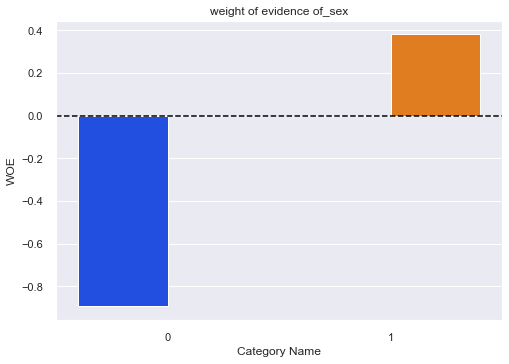

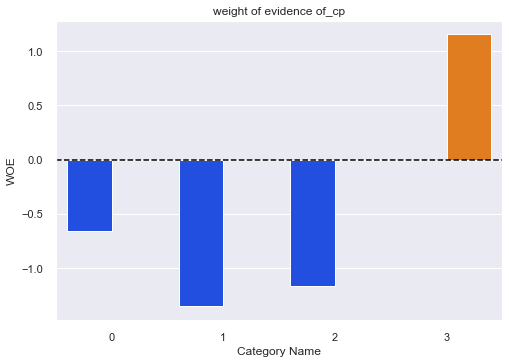

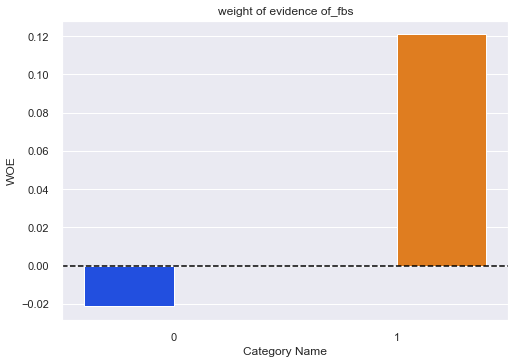

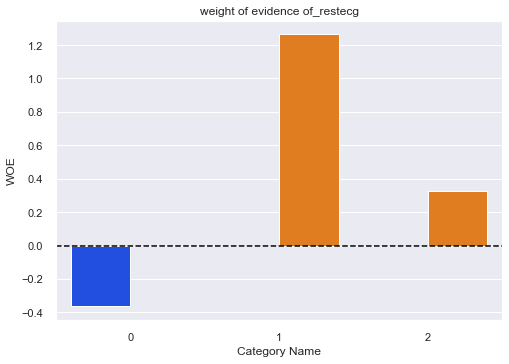

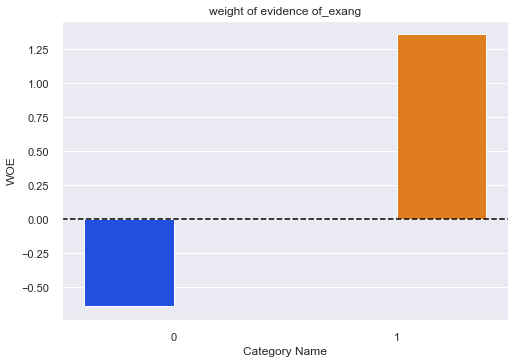

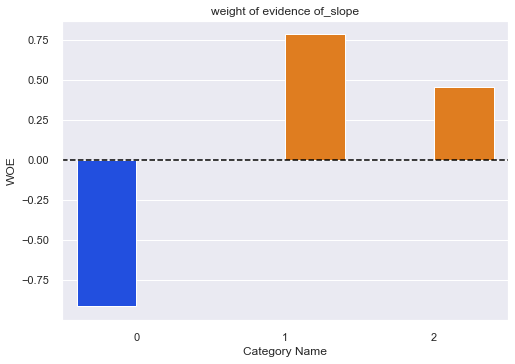

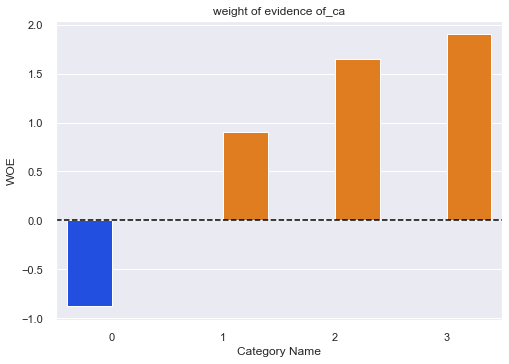

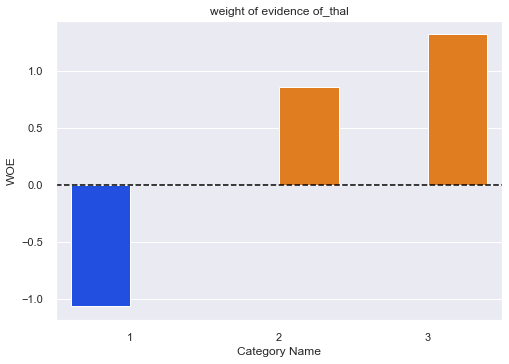

In [1777]:
# creating the bar plot for weight of evidence for each level in each categorical variable
for col in c_dn:
    colors = [1 if c >= 0 else -1 for c in woe_dict[f'woe_{col}']["WOE"]] # to apply different colors to + and - values
    
    sns.set(font_scale=1)
    
    ax = sns.barplot(x = woe_dict[f'woe_{col}']["Category Name"], y = woe_dict[f'woe_{col}']["WOE"],
                data = woe_dict[f'woe_{col}'],hue=colors,palette='bright').legend_.remove() #to remove legends
    
    plt.xticks(rotation=0) #to rotate the x-ticks
    plt.axhline(y=0, color='black', linestyle='--') #to draw a line between positive and negative values 
    plt.title(f'weight of evidence of_{col}')
    plt.show()

### <b> 6b. Data transformation using WOE Values

----> <b>Categorical variables

In [1778]:
c_dn = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

In [1779]:
woe_dict["woe_fbs"]

,Variable Name,Category Name,WOE
11,fbs,0,-0.021193
12,fbs,1,0.120941


In [1780]:
woe_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
230,52,0,2,136,196,0,2,169,0,0.1,1,0,1,0
43,59,1,2,150,212,1,0,157,0,1.6,0,0,1,0
283,35,1,1,122,192,0,0,174,0,0.0,0,0,1,0
206,58,1,3,128,259,0,2,130,1,3.0,1,2,3,1
42,71,0,1,160,302,0,0,162,0,0.4,0,2,1,0


In [1781]:
# Replacing Variable Levels with respective Weight of Evidence
woe_data['sex'] = woe_data['sex'].map({0:-0.892398,1:0.379802})
woe_data['cp']= woe_data['cp'].map({0:-0.661286,1:-1.350955,2:-1.163743,3:1.155791})
woe_data['fbs']= woe_data['fbs'].map({0:-0.021193,1:0.120941})
woe_data['restecg']= woe_data['restecg'].map({0:-0.363133,1:1.264005,2:0.327911})
woe_data['exang']= woe_data['exang'].map({0:-0.640233,1:1.360632})
woe_data['slope']= woe_data['slope'].map({0:-0.914528,1:0.784432,2:0.453075})
woe_data['ca']= woe_data['ca'].map({0:-0.874809,1:0.905060,2:1.653470,3:1.899994})
woe_data['thal']= woe_data['thal'].map({1:-1.064556,2:0.858540,3:1.321824})

In [1782]:
woe_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
230,52,-0.892398,-1.163743,136,196,-0.021193,0.327911,169,-0.640233,0.1,0.784432,-0.874809,-1.064556,0
43,59,0.379802,-1.163743,150,212,0.120941,-0.363133,157,-0.640233,1.6,-0.914528,-0.874809,-1.064556,0
283,35,0.379802,-1.350955,122,192,-0.021193,-0.363133,174,-0.640233,0.0,-0.914528,-0.874809,-1.064556,0
206,58,0.379802,1.155791,128,259,-0.021193,0.327911,130,1.360632,3.0,0.784432,1.653470,1.321824,1
42,71,-0.892398,-1.350955,160,302,-0.021193,-0.363133,162,-0.640233,0.4,-0.914528,1.653470,-1.064556,0


--> <b>Numerical Variable

In [1783]:
# Checking the number of bin and replacing the original values with woe values based on the values in respective bins. 

for i in num:
    
    if len(woe_num[i]) == 3:
        woe_data[i] = np.where(woe_data[i]<=woe_num[i].iloc[2][i],woe_num[i].iloc[2]["WOE_"+i],
                                  np.where(woe_data[i]<=woe[i].iloc[1][i],woe[i].iloc[1]['WOE_'+i],
                                  woe_num[i].iloc[0]['WOE_'+i]))
        
    if len(woe_num[i]) == 2:
        woe_data[i] = np.where(woe_data[i]<=woe_num[i].iloc[1][i],woe_num[i].iloc[1]["WOE_"+i],
                                           woe_num[i].iloc[0]["WOE_"+i])
        

In [1784]:
# If bin size is greater than 3
woe_data['chol']=woe_data['chol'].apply(lambda x: woe_num['chol'].iloc[3].WOE_chol if x<= woe_num['chol'].iloc[3].chol 
                   else (woe_num['chol'].iloc[2].WOE_chol if x<= woe_num['chol'].iloc[2].chol 
                   else (woe_num['chol'].iloc[1].WOE_chol if x<= woe_num['chol'].iloc[1].chol
                   else woe_num['chol'].iloc[0].WOE_chol)))

In [1785]:
woe_data.drop(["thalach","chol","fbs"],axis=1,inplace=True ) # drop insignificant variable from IV and hypothesis testing

In [1786]:
woe_data.head()

,age,sex,cp,trestbps,restecg,exang,oldpeak,slope,ca,thal,target
230,0.626723,-0.892398,-1.163743,-0.155406,0.327911,-0.640233,0.841380,0.784432,-0.874809,-1.064556,0
43,-0.560419,0.379802,-1.163743,-0.155406,-0.363133,-0.640233,-0.766741,-0.914528,-0.874809,-1.064556,0
283,0.626723,0.379802,-1.350955,0.278729,-0.363133,-0.640233,0.841380,-0.914528,-0.874809,-1.064556,0
206,-0.560419,0.379802,1.155791,-0.155406,0.327911,1.360632,-0.766741,0.784432,1.653470,1.321824,1
42,-0.560419,-0.892398,-1.350955,-0.155406,-0.363133,-0.640233,0.841380,-0.914528,1.653470,-1.064556,0


### <b> 6c. Fitting logistic regression model and cross validation

In [1787]:
X_train_woe= woe_data.drop(["target"],axis=1)
y_train_woe= woe_data["target"]

In [1788]:
# evaluate a model using kfold cross validation
def evaluate_model(X, y, model):
    
     # 5folds 10times on differnt samples(random state is not specified)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
    
     # evaluate model
    scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
    return np.mean(scores)

In [1789]:
# Goodness of fit for logistic regression model
mcfadden_R2(X_train_woe,y_train_woe)

McFadden's R2: 0.510697931467841


In [1790]:
evaluate_model(X_train_woe, y_train_woe, lr)   # f1 score

0.8121230812179767

### <b> 6d. Hyperparameter tuning of the model  

In [1791]:
import time
start=time.time()

# Define the hyperparameters and their potential values for tuning
param_grid = {
    'C': [0.01,0.03,0.05],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l1', 'l2'],
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 200, 500]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)
grid_search.fit(X_train_woe, y_train_woe)

# Get the best hyperparameter values and corresponding score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

end = time.time()

print("timetaken:",end-start)

Best parameters: {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best score: 0.8347729789590254
timetaken: 3.1192665100097656


### <b> 6e. Cross validation with best parameters of the model 

In [1792]:
lr_best = LogisticRegression(C= 0.01, class_weight= 'balanced', max_iter = 100, penalty= 'l2', solver= 'newton-cg')
evaluate_model(X_train_woe, y_train_woe, model)

0.8029459304991228

### <u> 07.TRAINING NON-PARAMETRIC MODEL(Random forest)

### 7a. Variable importance

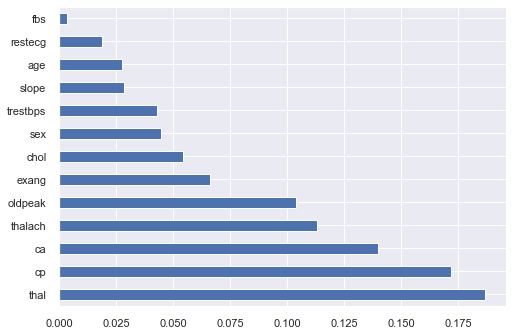

In [1793]:
# variable importance for tree based model

rf.fit(X_train,y_train)

feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### <B> 7b. Cross validation with default model

In [1794]:
# using random forest
rf  = RandomForestClassifier()

In [1795]:
X_train.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
230,4,0,2,136,196,0,2,169,0,0.1,1,0,1
43,4,1,2,150,212,1,0,157,0,1.6,0,0,1


In [1796]:
evaluate_model(X_train_woe, y_train_woe, rf) # rf performance with woe data

0.8080119798777621

In [1797]:
evaluate_model(X_train, y_train, rf) # rf performance with untransformed data

0.791444301415199

### <B> 7c. Hyperparameter tuning and cross validation 

In [1798]:
start = time.time()

# Hyper parameters range intialization for tuning 
param_grid = {"class_weight":[{0:neg_weight, 1:1} for neg_weight in np.arange(1.0, 5.0, 0.5)],
             "bootstrap": [True, False],
            "max_depth" : [6,8,10],
            "max_leaf_nodes": [30,40,50],
            "max_features":["log2","sqrt"],#log2 = log(n_features),sqrt = sqrt(n_features)
            "n_estimators":[100,150,200],
            "min_samples_leaf":[4,5,6],
            "min_samples_split": [2,3,4],
            "criterion" :["gini", "entropy"] #split based on least gini impurity ,high information gain(entropy)
             }

#Gridsearch (5fold_cv) 
CV_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,n_iter=10,cv=5,n_jobs=-1,verbose=1)
CV_rf.fit(X_train_woe, y_train_woe)

end = time.time()

print("timetaken:",1000*(end-start)/60000,"min")

#Best parameters
CV_rf.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
timetaken: 0.09851553042729695 min


{'n_estimators': 150,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_leaf_nodes': 30,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'entropy',
 'class_weight': {0: 1.0, 1: 1},
 'bootstrap': False}

In [1799]:
# using random forest
rf  = RandomForestClassifier(n_estimators = 200,
                             min_samples_split =3,
                             min_samples_leaf = 5,
                             max_leaf_nodes = 50,
                             max_features = 'sqrt',
                             max_depth = 8,
                             criterion = 'entropy',
                             class_weight = {0: 2.0, 1: 1},
                             bootstrap = False)

evaluate_model(X_train_woe, y_train_woe, rf) # rf performance with woe transformed data

0.796464601619477

### <u> 08. PREDICTING THE TEST DATA 

* <b> Logistic regression model is performing better on woe_transformed data

In [1800]:
lr_best  #Model with best parameter

LogisticRegression(C=0.01, class_weight='balanced', solver='newton-cg')

### 8a.Transforming test data with WOE values

In [1801]:
# Replacing Variable Levels with respective Weight of Evidence
X_test['sex'] = X_test['sex'].map({0:-0.892398,1:0.379802})
X_test['cp']= X_test['cp'].map({0:-0.661286,1:-1.350955,2:-1.163743,3:1.155791})
X_test['fbs']= X_test['fbs'].map({0:-0.021193,1:0.120941})
X_test['restecg']= X_test['restecg'].map({0:-0.363133,1:1.264005,2:0.327911})
X_test['exang']= X_test['exang'].map({0:-0.640233,1:1.360632})
X_test['slope']= X_test['slope'].map({0:-0.914528,1:0.784432,2:0.453075})
X_test['ca']= X_test['ca'].map({0:-0.874809,1:0.905060,2:1.653470,3:1.899994})
X_test['thal']= X_test['thal'].map({1:-1.064556,2:0.858540,3:1.321824})

In [1802]:
for i in num:
    
    if len(woe_num[i]) == 3:
        X_test[i] = np.where(X_test[i]<=woe_num[i].iloc[2][i],woe_num[i].iloc[2]["WOE_"+i],
                                  np.where(X_test[i]<=woe[i].iloc[1][i],woe[i].iloc[1]['WOE_'+i],
                                  woe_num[i].iloc[0]['WOE_'+i]))
        
    if len(woe_num[i]) == 2:
        X_test[i] = np.where(X_test[i]<=woe_num[i].iloc[1][i],woe_num[i].iloc[1]["WOE_"+i],
                                           woe_num[i].iloc[0]["WOE_"+i])

In [1803]:
X_test['chol']=X_test['chol'].apply(lambda x: woe_num['chol'].iloc[3].WOE_chol if x<= woe_num['chol'].iloc[3].chol 
                   else (woe_num['chol'].iloc[2].WOE_chol if x<= woe_num['chol'].iloc[2].chol 
                   else (woe_num['chol'].iloc[1].WOE_chol if x<= woe_num['chol'].iloc[1].chol
                   else woe_num['chol'].iloc[0].WOE_chol)))

In [1804]:
X_test.drop(["thalach","chol","fbs"],axis=1,inplace=True )

In [1805]:
X_test.head()

,age,sex,cp,trestbps,restecg,exang,oldpeak,slope,ca,thal
76,0.626723,0.379802,1.155791,-0.155406,0.327911,1.360632,-0.766741,0.784432,0.905060,1.321824
132,0.626723,0.379802,-1.350955,-0.155406,0.327911,-0.640233,0.841380,-0.914528,-0.874809,-1.064556
205,0.626723,0.379802,1.155791,-0.155406,0.327911,1.360632,0.841380,0.784432,1.899994,1.321824
292,0.626723,0.379802,1.155791,0.278729,-0.363133,1.360632,-0.766741,0.453075,-0.874809,0.858540
66,0.626723,0.379802,-1.163743,-0.155406,0.327911,-0.640233,-0.766741,0.784432,-0.874809,-1.064556


### 8b. Predict test data using Logistic regression and random forest models

In [1806]:
# predict the X-test using logistic regression
lr_best.fit(X_train_woe, y_train_woe)
y_pred = lr_best.predict(X_test)

In [1807]:
# predict using random forest
rf.fit(X_train_woe, y_train_woe)
y_pred1=rf.predict(X_test)

### <u> 09. MODEL PERFORMANCE IN PREDICTION 

In [1808]:
def multiple_model(model,x_train,y_train,x_valid,y_valid):           

    t_model = model.fit(x_train,y_train)
    pred = t_model.predict(x_valid)

    print("__"*50)
    print(model)
    print(classification_report(y_valid,pred))
    cm1= mat.confusion_matrix(y_valid,pred)
    TN = cm1[0][0]
    FN = cm1[1][0]
    TP = cm1[1][1]
    FP = cm1[0][1]
    cm1_frame = pd.DataFrame({"Predicted +ve [1]":[TP,FP],"Predicted -ve [0]":[FN,TN]},index=["Actual +ve [1]","Actual -ve [0]"])
    print(cm1_frame)

### <b>9a.Logistic Regression

In [1809]:
# Logistic regression on test data
multiple_model(lr_best,X_train_woe,y_train_woe,X_test,y_test)

____________________________________________________________________________________________________
LogisticRegression(C=0.01, class_weight='balanced', solver='newton-cg')
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        49
           1       0.84      0.86      0.85        42

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91

                Predicted +ve [1]  Predicted -ve [0]
Actual +ve [1]                 36                  6
Actual -ve [0]                  7                 42


### 9b.<b>Random forest

In [1810]:
# random forest on test data
multiple_model(rf,X_train_woe,y_train_woe,X_test,y_test)

____________________________________________________________________________________________________
RandomForestClassifier(bootstrap=False, class_weight={0: 2.0, 1: 1},
                       criterion='entropy', max_depth=8, max_features='sqrt',
                       max_leaf_nodes=50, min_samples_leaf=5,
                       min_samples_split=3, n_estimators=200)
              precision    recall  f1-score   support

           0       0.77      0.98      0.86        49
           1       0.97      0.67      0.79        42

    accuracy                           0.84        91
   macro avg       0.87      0.82      0.83        91
weighted avg       0.86      0.84      0.83        91

                Predicted +ve [1]  Predicted -ve [0]
Actual +ve [1]                 28                 14
Actual -ve [0]                  1                 48


###  <b>9c.Visualizing AUROC graph

Auroc_Logistic.reg: 0.8571428571428572
Auroc_Random.forest: 0.8350340136054422


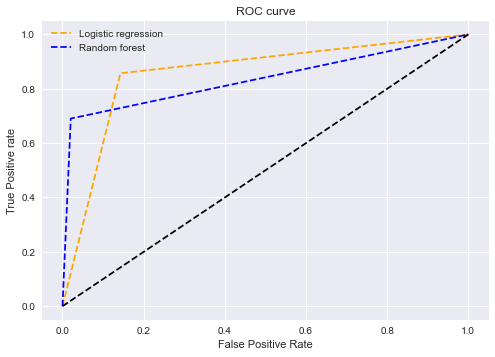

In [1811]:
# matplotlib

plt.style.use('seaborn')

# plot roc curves
auroc_lr = mat.roc_auc_score(y_test,y_pred)
print("Auroc_Logistic.reg:",auroc_lr)
auroc_rf = mat.roc_auc_score(y_test,y_pred1)
print("Auroc_Random.forest:",auroc_rf)

fpr1, tpr1, _ = mat.roc_curve(y_test,y_pred)
fpr2, tpr2, _ = mat.roc_curve(y_test,y_pred1)


plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic regression')
plt.plot(fpr2, tpr2, linestyle='--',color='blue', label='Random forest')

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = mat.roc_curve(y_test, random_probs, pos_label=1)
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()


* The logistic model is performing better in overall in prediction positive and negative classes compared to random forest model.The best thershold cuttoff can be chosen for better predicting both the classes by deducting TRUE POSITIVE RATE- FALSE POSITIVE RATE across all the points in the auroc graph.

### <u> 10.SHAPLEY VALUES

<b> This values helps to identify the individual contribution of each feature towards predicting the outcome for all observations.

### <B> 10a.Calculate shapley values for logistic regression

In [1812]:
masker = shap.maskers.Independent(X_train_woe, 50)
explainer = shap.KernelExplainer(lr_best.predict, masker.data)
shap_values = explainer.shap_values(X_test)

  0%|          | 0/91 [00:00<?, ?it/s]

In [1813]:
# Null model prediction (Avg_prediction)
explainer.expected_value

0.36

In [1814]:
# Shapley values in Dataframe
shap_frame = pd.DataFrame(shap_values,columns=X_train_woe.columns)
shap_frame

,age,sex,cp,trestbps,restecg,exang,oldpeak,slope,ca,thal
0,-0.006381,0.013825,0.181302,0.000063,0.006349,0.088254,0.032921,0.034063,0.126778,0.162825
1,-0.006429,0.004476,-0.103476,0.000000,0.003286,-0.029952,-0.034143,-0.029143,-0.073143,-0.091476
2,-0.005810,0.014381,0.181000,0.000000,0.008571,0.071238,-0.025143,0.024381,0.215619,0.155762
3,-0.014071,0.011143,0.301643,-0.000500,-0.006881,0.125595,0.049690,0.038214,-0.022286,0.157452
4,-0.026714,0.009952,-0.098381,0.000000,0.001952,-0.061381,0.012286,0.005286,-0.072000,-0.131000
5,-0.010333,0.021667,0.364333,0.000000,0.007000,0.075000,-0.054667,-0.049667,-0.030333,0.317000
6,-0.005667,-0.017333,0.137667,0.000000,0.000000,-0.124333,0.014000,0.011667,-0.137333,-0.238667
7,-0.008667,0.012667,0.383000,0.000000,0.024667,-0.031000,0.039000,-0.029667,-0.031667,0.281667
8,-0.015667,-0.035381,0.136468,0.000413,-0.006984,0.072873,-0.069913,-0.070929,-0.140659,-0.230222
9,-0.033714,0.026619,-0.052048,0.000000,0.004286,0.320000,0.058952,0.058952,-0.038333,0.295286


### <b> 10b. Interpreting instances

* <B>Explaining how the Model predicted the patient/observation4 as "class 1"

In [1815]:
# Prediction
y_pred = lr_best.predict(X_train_woe)
y_pred[3]  #looking at 4th observation

1

In [1816]:
# Explanatory model (additive)
print("Avg_model_prediction:",explainer.expected_value)
print("Sum of shap values:",np.sum(shap_frame.iloc[3,:]))

Avg_model_prediction: 0.36
Sum of shap values: 0.64


In [1817]:
# shapley value for 1st observation/ a Patient 
obs = pd.DataFrame(shap_frame.iloc[3,:]).T
obs["Model_pred"] = y_pred[3]
obs["Shap_pred"] = explainer.expected_value + np.sum(shap_frame.iloc[3,:])
obs

,age,sex,cp,trestbps,restecg,exang,oldpeak,slope,ca,thal,Model_pred,Shap_pred
3,-0.014071,0.011143,0.301643,-0.0005,-0.006881,0.125595,0.04969,0.038214,-0.022286,0.157452,1,1.0


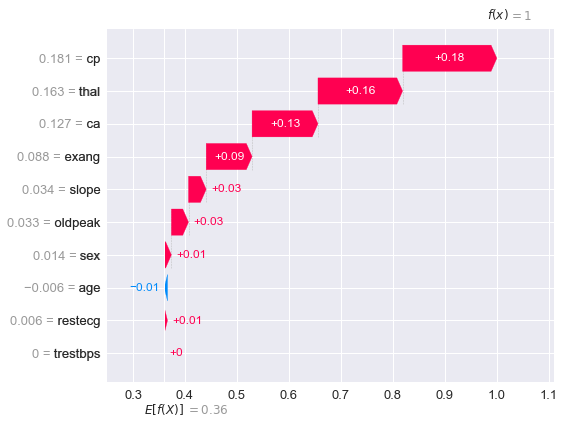

In [1818]:
# waterfall plot 

shap_object = shap.Explanation(base_values = explainer.expected_value,
                                values = shap_values[0],
                                feature_names = X_train_woe.columns,
                                data = shap_values[0].data)

shap.plots.waterfall(shap_object)

### <font color= green> Explanation:
    
* The average model (null model), which does not include any variables, yields a log(odds) value of 0.36 for the likelihood of a patient having heart disease. When considering the individual variables, the variable "chest pain experienced" (cp) contributes significantly towards the occurrence of heart disease, adding a log(odds) value of 0.18. Following that, the variable "blood flow disorder" contributes with a value of 0.16, and so on.

### 11.CONCLUSION

* The logistic regression model trained on Weight of Evidence (WOE) transformed data has shown improved performance in predicting the target class (heart disease). It achieved an F1 score of 0.87 for predicting non-events (individuals without heart disease) and 0.85 for predicting events (individuals with heart disease).

* This predictive model is valuable in healthcare scenarios as it can help avoid unnecessary prescriptions by classifying them as true negatives, minimizing potential risks. Additionally, it can enhance patient care by providing early intervention and extra attention to those classified as true positives, ensuring proactive measures are taken.

* However, given the high accuracy requirements in the medical field, we need to further enhance our model's performance. This can be achieved by considering a larger sample size to improve generalization, incorporating additional significant variables into the data to capture more predictive information, and exploring alternative models that may better suit the data characteristics.

                                                ~ The End ~